# basics_linear_regression

In [61]:
# import libaries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### numpy: is a library for scientific computing.
#### pandas: is a library for data analysis.
#### matplotlib :is a library for plotting.
#### os :is a library for interacting with the operating system.
#### sklearn.model_selection :is a library for splitting data into training and test sets.
#### sklearn.linear_model: is a library for linear regression.
#### sklearn.metrics :is a library for evaluating machine learning models.

# Load data

In [62]:
data = pd.read_csv("mtcars.csv")
data

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


# EDA

### Show a list of the column names in the dataset. 

In [63]:
data.columns   

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

### Print first few rows from the dataset.

In [64]:
data.head()   

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Print summary of the statistical distribution of the numeric columns in a dataset.

In [65]:
data.describe()  

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


### Print a summary of the dataset, including the number of rows, the number of columns, the data type of each column, and the number of non-null values in each column.

In [66]:
data.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


### Create a scatter plot of the mpg and horsepower columns in the dataset. The 'rx' argument specifies that the points should be plotted as red crosses.

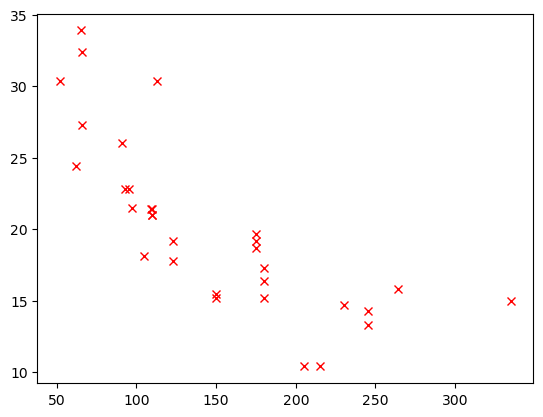

In [67]:
plt.plot(data.hp  , data.mpg     ,'rx')

# Problem framing 

### Set the horsepower column as the independent variable and the mpg column as the dependent variable

In [68]:
# set depandent and independant variable
X = data[ "hp"]
y = data[ "mpg" ]

# Prepare data for ML model 

### split the data into a training set and a test set.

### The train_test_split() function is a built-in function in the scikit-learn library. It takes four arguments:
#### X: The independent variables.
#### y: The dependent variables.
#### test_size: The proportion of the data that should be used for the test set.
#### random_state: A random number seed.
### The train_test_split() function will randomly split the data into two sets: the training set and the test set. The training set will be used to train the machine learning model. The test set will be used to evaluate the performance of the machine learning model.

### In this case, the test_size argument is set to 0.3, which means that 30% of the data will be used for the test set and 70% of the data will be used for the training set. The random_state argument is set to 47, which ensures that the same random split of the data is used each time the code is run.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)


### The X_train and y_train variables can be used to train the machine learning model. The X_test and y_test variables can be used to evaluate the performance of the machine learning model.

# Training linear regression model

### create a linear regression model.

In [70]:
linear_regressor = LinearRegression()

### reshape the X_train and y_train variables to be 2D arrays with a single column. This is necessary because the LinearRegression() class expects the independent variables and dependent variables to be 2D arrays.

### The -1 argument in the reshape() method tells NumPy to infer the number of rows in the array from the data buffer. The 1 argument in the reshape() method tells NumPy to create a single column in the array.

In [71]:
X_train = X_train.values.reshape((-1, 1))
y_train = y_train.values.reshape((-1, 1))

### will fit the linear regression model to the training data.

### The fit() method of the LinearRegression() class takes two arguments:

### X: The independent variables.
### y: The dependent variables.
### The fit() method will fit the model to the data and return the model object.

### The fit() method will calculate the coefficients of the linear regression model. The coefficients are the values that multiply the independent variables to predict the dependent variable.

### Once the model is fitted, it can be used to predict the values of the dependent variable for new data.

In [72]:
linear_regressor.fit(X_train, y_train)

LinearRegression()

# Interprete the model

In [73]:
print(linear_regressor.intercept_)

print(linear_regressor.coef_)

[32.57328739]
[[-0.08088592]]


# Make prediciton 

In [74]:
X_test = X_test.values.reshape((-1, 1))

In [75]:
y_pred = linear_regressor.predict(X_test)

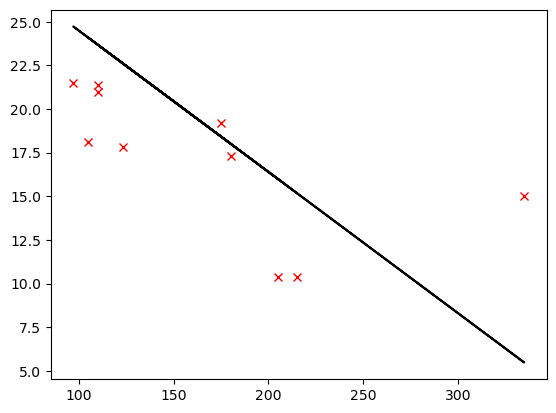

In [76]:
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, color='black')
plt.show()

# Evaluate the model 

In [77]:
metrics.mean_absolute_error(y_test, y_pred)

4.037716269958922

In [78]:
metrics.mean_squared_error(y_test, y_pred)

22.77527409938847

In [79]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

4.772344717158272